# Downloading the Data
To begin, let's download the data using the `urlretrieve` function from `urllib.request`.

In [1]:
import  requests
import os
medical_charges_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
datasets_path = "datasets"

In [2]:
filename = "medical.csv"
filepath = os.path.join(datasets_path, filename)
if not os.path.isfile(filepath):
    try:
        os.makedirs(datasets_path, exist_ok=True)
        response = requests.get(medical_charges_url, stream=True)
        response.raise_for_status()
        
        with open(filepath, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"CSV file downloaded successfully to {datasets_path}/{filename}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloadinf the file {e}")
else:
    print("File already exists")

File already exists


In [3]:
import pandas as pd
medical_df = pd.read_csv(filepath)
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [8]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the ditribution of age using histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [9]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Ditribution of Age',)
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Ditribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color='smoker',
    color_discrete_sequence=['green', 'grey'],
    title='Annual Medical Charges',
)
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(
    medical_df,
    x='charges',
    color='sex',
    facet_col='region',
    marginal='box',
    hover_data=medical_df.columns,
    title='Распределение медицинских расходов по полу и региону',
    barmode='overlay',
    opacity=0.7,
    nbins=40
)

fig.update_layout(
    bargap=0.1,
    xaxis_title="medical charges",
    yaxis_title="Count",
    legend_title="Sex",
    title_x=0.5
)

fig.for_each_annotation(
    lambda a: a.update(text=a.text.split("=")[-1])
)

fig.show()

In [13]:
fig = px.histogram(
    data_frame=medical_df,
    x='charges',
    marginal='box',
    color='sex',
    color_discrete_sequence=['green', 'grey'],
)
fig.show()


In [14]:
fig = px.histogram(
    data_frame=medical_df,
    x='charges',
    marginal='box',
    color='region',
    color_discrete_sequence=['green', 'grey', 'red', 'blue'],
)
fig.show()

In [15]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [16]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [17]:
fig = px.histogram(medical_df, x='smoker', color='children')
fig.show()

In [18]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [19]:
fig = px.violin(medical_df, x='charges',color='sex')
fig.show()

In [20]:
fig = px.violin(medical_df, x='charges',color='smoker')
fig.show()

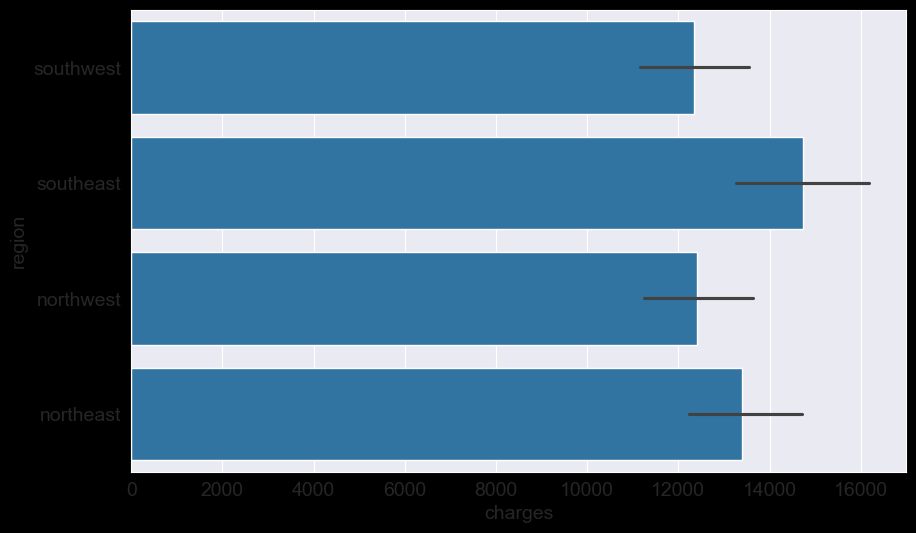

In [21]:
fig = sns.barplot(medical_df, x='charges',y='region')

In [22]:
px.violin(medical_df, x='children', y='charges')

In [23]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [24]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [25]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

In [26]:
import numpy as np
medical_num_df = medical_df.select_dtypes(include=np.number)
medical_num_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'correlation matrix')

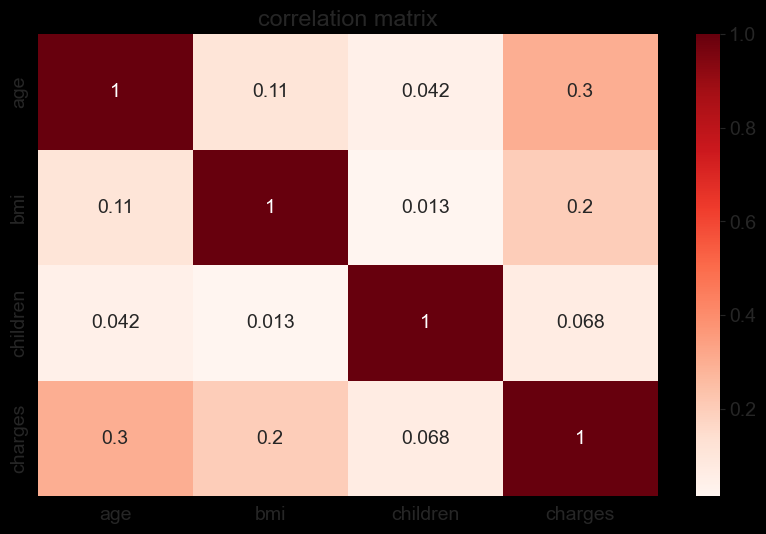

In [27]:
sns.heatmap(medical_num_df.corr(), cmap='Reds', annot=True)
plt.title('correlation matrix')

###  Linear regression using a SIngle Feature

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

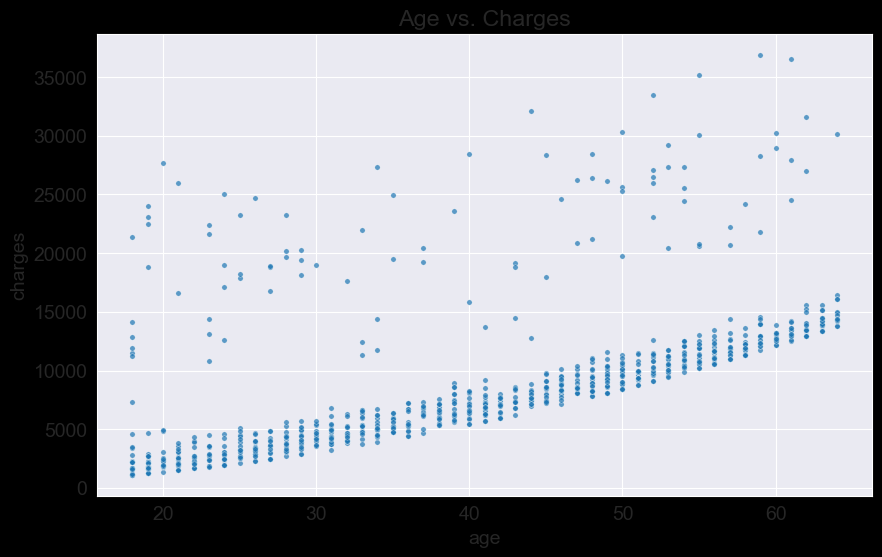

In [28]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
# visualzie the relationship between 'age' and 'charges'
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

In [29]:
def estimate_charges(age, w, b):
    return w * age + b

In [30]:
w = 50
b = 100

In [31]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

Text(0, 0.5, 'Estimated Charges')

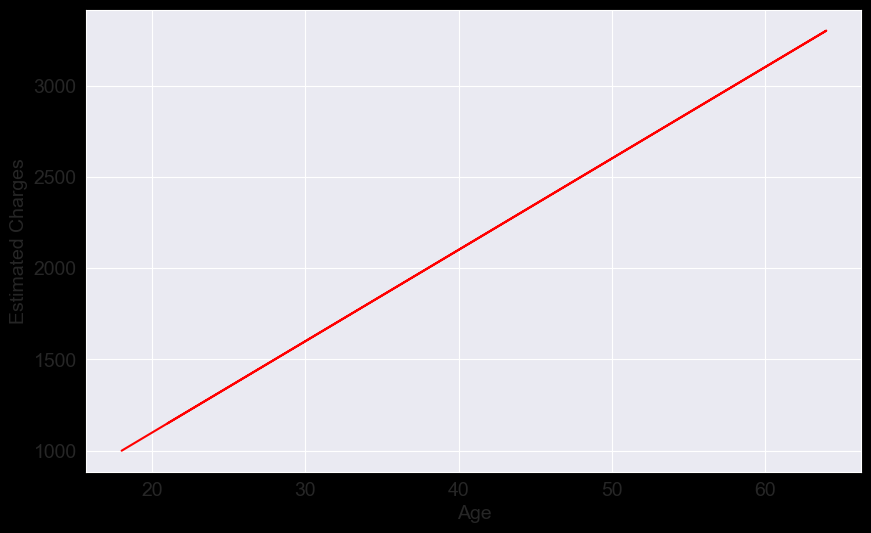

In [32]:
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

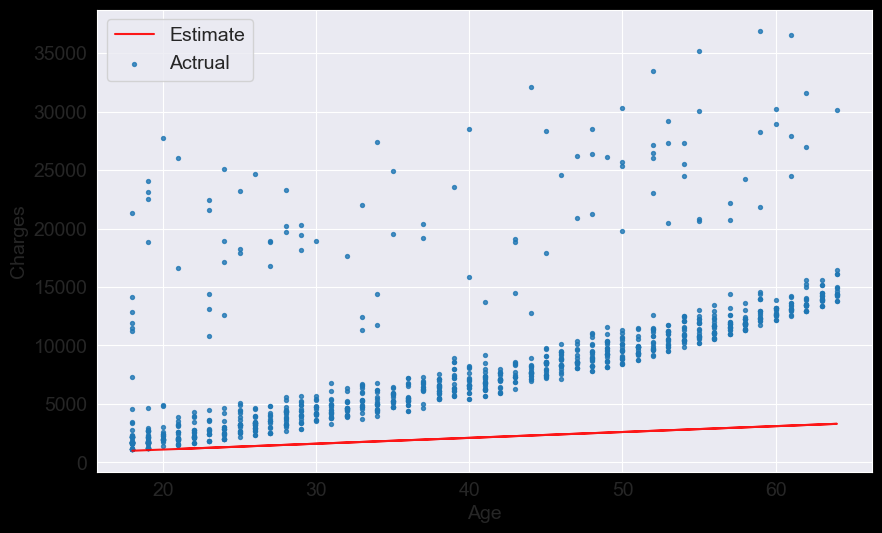

In [33]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actrual'])

In [34]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages , w, b)
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actrual'])

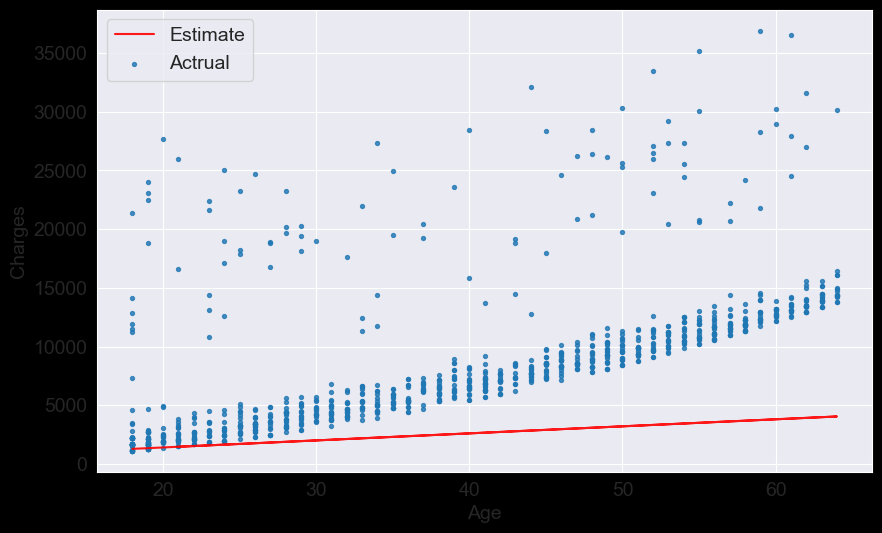

In [35]:
try_parameters(60, 200)

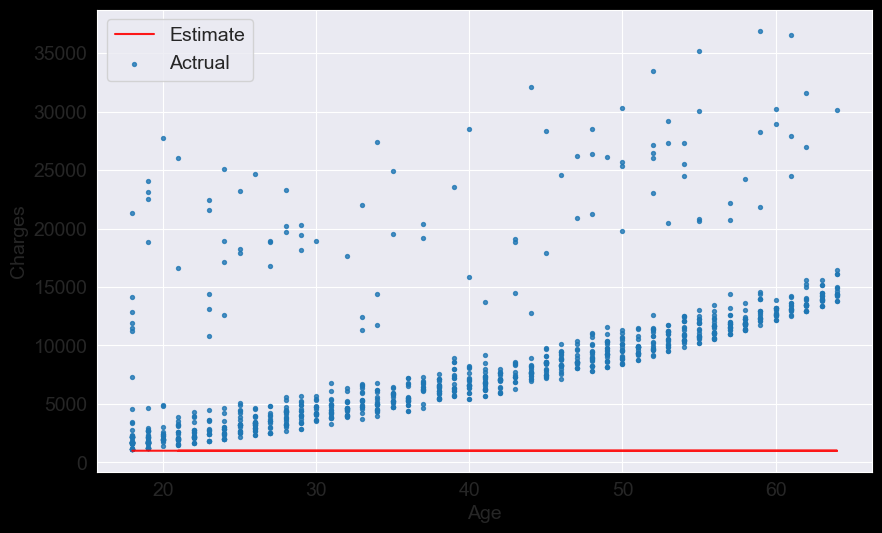

In [36]:
try_parameters(0, 1000)

In [37]:
import numpy as np

def rmse(targets, predictions):
    return  np.sqrt(np.mean(np.square(targets - predictions)))

In [38]:
w = 50
b = 100

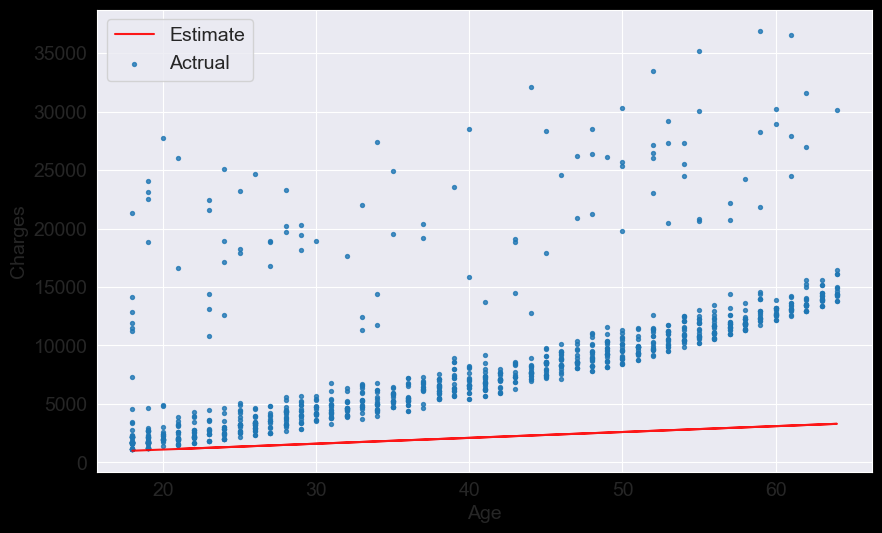

In [39]:
try_parameters(w, b)

In [40]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [41]:
rmse(targets, predicted)

np.float64(8461.949562575493)

### modify the try_parameters functions to also display the loss.

In [42]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)
    

RMSE Loss:  4733.257087602523


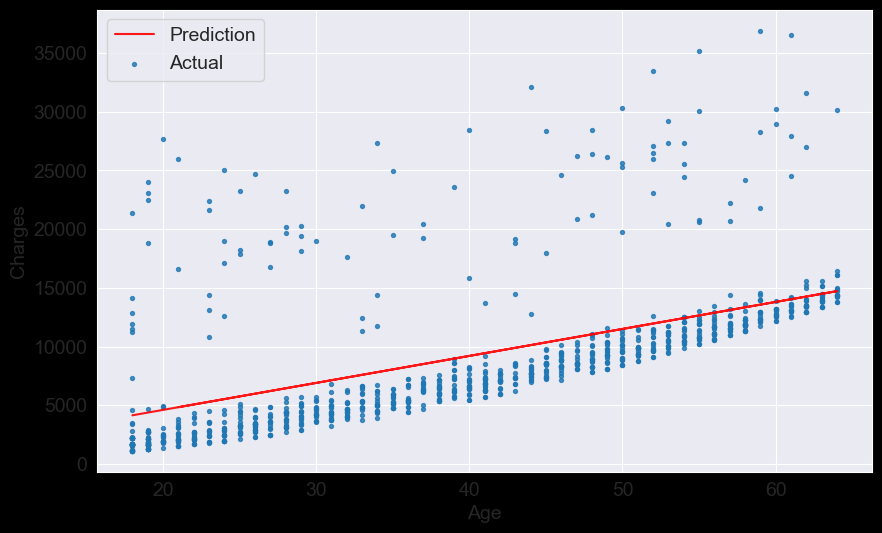

In [43]:
try_parameters(230, 0)

### Linear regression using scikit-learn

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [46]:
inputs = non_smoker_df[['age']]
print('inputs.shape :', inputs.shape)
print('targets.shape :', targets.shape)

inputs.shape : (1064, 1)
targets.shape : (1064,)


In [47]:
preds = model.predict(np.array([[23],
                        [37],
                        [61]]))
preds, np.array(targets)[[23, 37, 61]]

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(targets, model.predict(inputs))

4662.505766636395

In [ ]:
model.coef_, model.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

RMSE Loss:  4662.505766636395


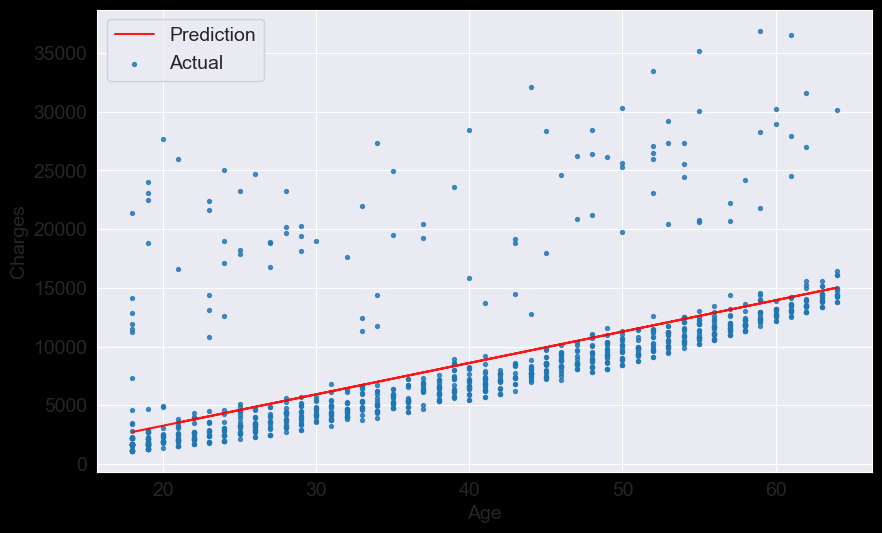

In [ ]:
try_parameters(model.coef_, model.intercept_)

In [ ]:
from sklearn.linear_model import SGDRegressor

model_1 = SGDRegressor()
model_1.fit(X=inputs, y=targets)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [ ]:
root_mean_squared_error(targets, model_1.predict(inputs))

4908.964721723485

RMSE Loss:  4908.964721723485


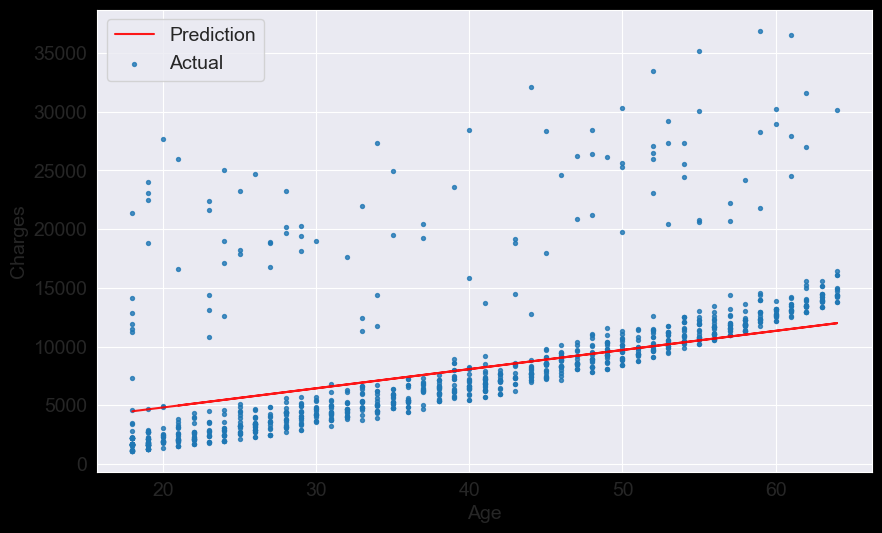

In [ ]:
try_parameters(model_1.coef_, model_1.intercept_)

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [ ]:
medical_smok_df = medical_df[medical_df['smoker'] == 'yes']

In [ ]:
from sklearn.linear_model import LinearRegression

targets = medical_smok_df['charges']
inputs = medical_smok_df[['age']]
model = LinearRegression()
model.fit(X=inputs, y=targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
root_mean_squared_error(targets, model.predict(inputs))

10711.00334810241

RMSE Loss:  10711.00334810241


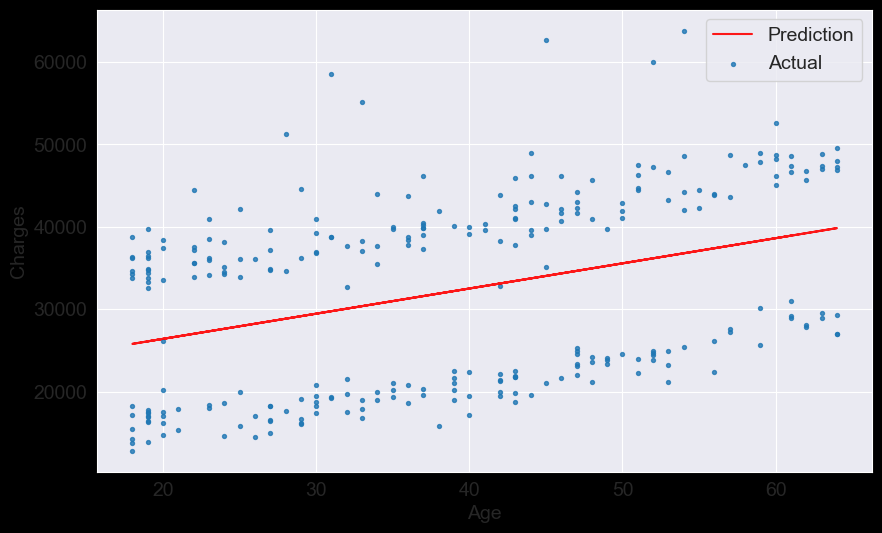

In [ ]:
def try_parameters(w, b):
    ages = medical_smok_df.age
    target = medical_smok_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)  

try_parameters(model.coef_, model.intercept_)

In [ ]:
model = LinearRegression()
inputs, targets = medical_df[['bmi']], medical_df['charges']

In [ ]:
model.fit(inputs, targets)
preds = model.predict(inputs)
root_mean_squared_error(targets, preds)

11864.986308399499

In [ ]:
fig = px.scatter(x=inputs.values.flatten(), y=preds)
fig.update_traces(marker_size=5)

<Axes: xlabel='smoker', ylabel='charges'>

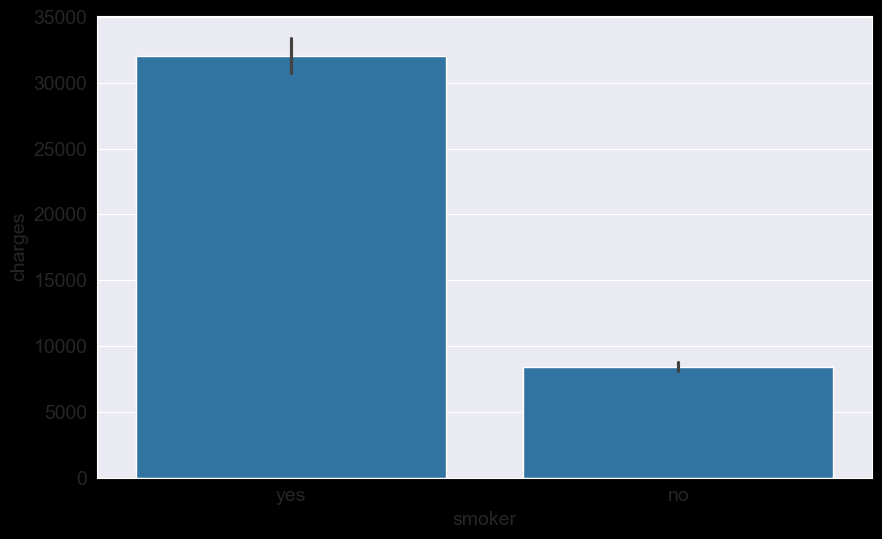

In [ ]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [48]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df['sex_code'] = medical_df.sex.map({'female': 0, 'male': 1})

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.7872514304984778)

In [ ]:
# create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# create and train the model
model = LinearRegression().fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate the model
from sklearn.metrics import root_mean_squared_error
loss = root_mean_squared_error(targets, predictions)
print('Loss: ', loss)

Loss:  6056.439217188081


<Axes: xlabel='region', ylabel='charges'>

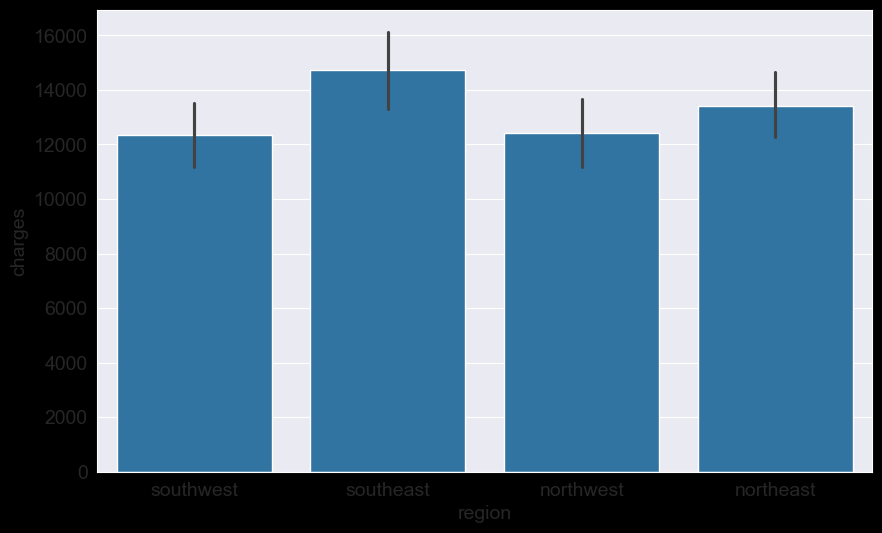

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges')

In [51]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [52]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [53]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [54]:
from sklearn.metrics import root_mean_squared_error
# create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# create and train the model
model = LinearRegression().fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate the model
loss = root_mean_squared_error(targets, predictions)
print('Loss: ', loss)

Loss:  6041.6796511744515


In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

,copy,True
,with_mean,True
,with_std,True


In [57]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [58]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [59]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [60]:
cat_cols =  ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [62]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# create and train the model
model = LinearRegression().fit(inputs, targets)

# generate predictions
predictions = model.predict(inputs)

# compute loss to evaluate the model
loss = root_mean_squared_error(targets, predictions)
print('Loss: ', loss)

Loss:  6041.679651174452


In [64]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 'intercept'),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,intercept,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [65]:
### Creating a Test Set

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [68]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# generate predictions
predictions_test = model.predict(inputs_test)

# compute loss to evaluate the model
loss = root_mean_squared_error(targets_test, predictions_test)
print('test loss: ', loss)

test loss:  6412.0248032534755


In [69]:
predictions_train = model.predict(inputs_train)
loss = root_mean_squared_error(targets_train, predictions_train)
print('train loss: ', loss)

train loss:  6003.994748002985
